<h1 style="color:#07B30C" align="center"> Tarea 2, Módulo 3</h1>
<h2 style="color:#07B30C"align="center"> Daniela Arely Morales Hernández </h2>
<h3 style="color:#07B30C"align="center"> 142976 </h3>

<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


----





In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


field,PX_HIGH,PX_LAST,Diferencia,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,,
2000-01-03,8.46,8.14,0.52,8.09,8.14,8.35,8755188.0
2000-01-04,7.89,7.62,0.01,7.61,7.61,7.86,26017417.0
2000-01-05,7.70,7.61,0.11,7.45,7.65,7.61,39735576.0
2000-01-06,7.71,7.50,-0.08,7.43,7.50,7.65,14939813.0
2000-01-07,7.59,7.58,-0.15,7.48,7.58,7.54,46276516.0


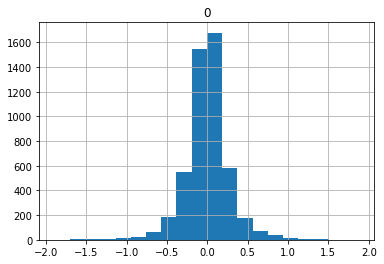

In [106]:
bmv = pd.read_csv("C:/Users/danie/Desktop/DATA/Modificado/Modulo3/lec02/ipc0019.csv")
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

cemex_ticker = "CEMEXCPO MF Equity"
cemex = bmv[cemex_ticker]

cemex.head()
##Declara la variable cemex_close siendo esta la columna PX_LAST dentro del DataFrame bmv
cemex_close = pd.to_numeric(cemex.PX_LAST)

##transforma el índice de cemex_close a fin de que sea un DateTimeIndex
date_index = pd.DatetimeIndex(cemex.index)
cemex.index= date_index
c1= cemex_close.shift(periods=-1)
#print(cemex_close)

#X = cemex_close[2]- c1[2]
    
#print(X)
cemex_diff = []
##crea un array de diferencias ###########

for i in range(len(cemex_close)): 
    X = cemex_close[i]- c1[i]
    cemex_diff.append(X)
             
# inserting new column with values of list made above         
cemex.insert(2, "Diferencia", cemex_diff) 
 
df = pd.DataFrame(cemex_diff)

hist = df.hist(bins=20)
cemex.head() 
##falta imprimir el ulitmo plot de las dos columnas
#cemex["Diferencia",hist].plot()


2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

---


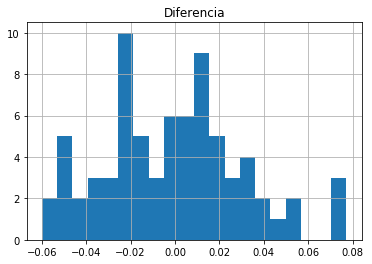

In [109]:

sample = cemex.loc[ : "2018-06-01", "Diferencia"]
# Agrupando valores por (final de) mes
cemex_std = pd.DataFrame(sample.resample("Q").mean())

hist = cemex_std.hist(bins=20)


3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

---


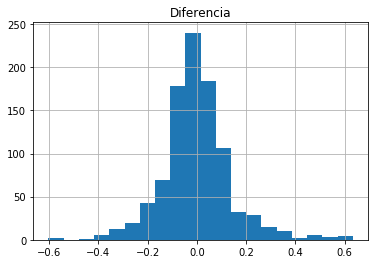

In [110]:
cemex_std = pd.DataFrame(sample.resample("W").mean())

hist = cemex_std.hist(bins=20)


4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?

---


'\nGrafica por mes las desvaciones estandar\n\n'

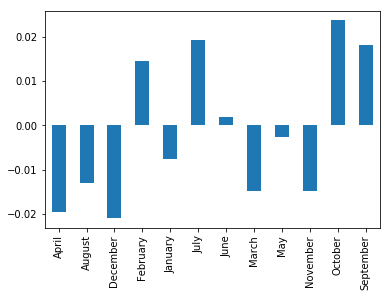

In [133]:
##No permite correr este codigo
##emex_diff no es un index Time
months = sample.index.strftime("%B")
sample.groupby(months).mean().plot(kind="bar")

##Respuesta:
'''
Grafica por mes las desvaciones estandar

'''


5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`. ¿Por qué difieren las gráficas?


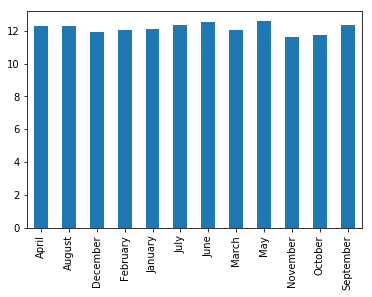

In [134]:
sample = cemex.loc[ : "2018-06-01", "PX_LAST"]

months = sample.index.strftime("%B")
sample.groupby(months).mean().plot(kind="bar")
